In [1]:
%load_ext watermark
%watermark  -d -u -a "Shihao Yang, Yifan Zhang, Kexiao Zhu" -v -p numpy,scipy,matplotlib,sklearn

Author: Shihao Yang, Yifan Zhang, Kexiao Zhu

Last updated: 2021-12-06

Python implementation: CPython
Python version       : 3.8.8
IPython version      : 7.22.0

numpy     : 1.20.1
scipy     : 1.6.2
matplotlib: 3.3.4
sklearn   : 0.24.1



In [2]:
import numpy as np
import pandas as pd

In [3]:
df = pd.read_csv("winequalityN.csv")
print(df.head())
print(df.info())
print(df.describe())

    type  fixed acidity  volatile acidity  citric acid  residual sugar  \
0  white            7.0              0.27         0.36            20.7   
1  white            6.3              0.30         0.34             1.6   
2  white            8.1              0.28         0.40             6.9   
3  white            7.2              0.23         0.32             8.5   
4  white            7.2              0.23         0.32             8.5   

   chlorides  free sulfur dioxide  total sulfur dioxide  density    pH  \
0      0.045                 45.0                 170.0   1.0010  3.00   
1      0.049                 14.0                 132.0   0.9940  3.30   
2      0.050                 30.0                  97.0   0.9951  3.26   
3      0.058                 47.0                 186.0   0.9956  3.19   
4      0.058                 47.0                 186.0   0.9956  3.19   

   sulphates  alcohol  quality  
0       0.45      8.8        6  
1       0.49      9.5        6  
2       0.4

In [4]:
label_list = []
labels_map = {
    "white": 0,
    "red": 1}
for i in range(len(df)):
    label_list.append(labels_map[df["type"][i]])
df["type"] = label_list

In [5]:
labels_map = {
    10: 'high',
    9: 'high',
    8: 'high',
    7: 'medium',
    6: 'medium',
    5: 'medium',
    4: 'medium',
    3: 'low',
    2: 'low',
    1: 'low'
}

In [6]:
df['quality'] = df['quality'].map(labels_map)

In [7]:
labels_map = {
    "low": 0,
    "medium": 1,
    "high": 2
}

In [8]:
label_list2 = []
for i in range(len(df)):
    label_list2.append(labels_map[df["quality"][i]])
df["label"] = label_list2

In [9]:
df.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,label
0,0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,medium,1
1,0,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,medium,1
2,0,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,medium,1
3,0,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,medium,1
4,0,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,medium,1


In [10]:
# imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
# data = df.values
# data = imputer.fit_transform(df.values)
# data
df = df.dropna()

X = df[['type','fixed acidity',"volatile acidity","citric acid","residual sugar","chlorides","free sulfur dioxide","total sulfur dioxide","density","pH","sulphates","alcohol"]].values
y = df['label'].values

In [11]:
from sklearn import tree
from sklearn import metrics
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=1, stratify=y)
print('X_train.shape:', X_train.shape)
print('y_train.shape:', y_train.shape)
print('X_test.shape:', X_test.shape)
print('y_test.shape:', y_test.shape)

X_train.shape: (4524, 12)
y_train.shape: (4524,)
X_test.shape: (1939, 12)
y_test.shape: (1939,)


In [12]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(X_train,y_train)
lr_score=lr.score(X_test,y_test)

In [13]:
from sklearn.svm import SVC
svm=SVC()
svm.fit(X_train,y_train)
svm=svm.score(X_test,y_test)

In [14]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(n_estimators=100)
rf.fit(X_train,y_train)
rf=rf.score(X_test,y_test)

In [15]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train,y_train)
knn=knn.score(X_test,y_test)

In [16]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()
dt.fit(X_train,y_train)
dt=dt.score(X_test,y_test)

In [17]:
from sklearn.naive_bayes import GaussianNB
nb=GaussianNB()
nb.fit(X_train,y_train)
nb=nb.score(X_test,y_test)

In [18]:
from sklearn import model_selection
from sklearn.ensemble import BaggingClassifier
# BAGGING
tree = DecisionTreeClassifier(criterion='entropy',
                              random_state=1,
                              max_depth=None)


bag = BaggingClassifier(base_estimator=tree,
                        n_estimators=500,
                        oob_score=True,
                        bootstrap=True,
                        bootstrap_features=False,
                        n_jobs=1,
                        random_state=1)

bag.fit(X_train, y_train)
bag_score = bag.score(X_test, y_test)

In [19]:
from mlxtend.classifier import EnsembleVoteClassifier
# Majority Voting
clf1 = DecisionTreeClassifier(random_state=1, max_depth=None)
clf2 = DecisionTreeClassifier(random_state=1, max_depth=10)
clf3 = DecisionTreeClassifier(random_state=1, max_depth=5)
eclf = EnsembleVoteClassifier(clfs=[clf1, clf2, clf3], weights=[1, 1, 1])

labels = ['Classifier 1', 'Classifier 2', 'Classifier 3', 'Ensemble']
for clf, label in zip([clf1, clf2, clf3, eclf], labels):

    clf.fit(X_train, y_train)
    print("Train Accuracy: %0.2f [%s]" % (clf.score(X_train, y_train), label))
    
vote_score = eclf.score(X_test, y_test)

Train Accuracy: 1.00 [Classifier 1]
Train Accuracy: 0.99 [Classifier 2]
Train Accuracy: 0.97 [Classifier 3]
Train Accuracy: 0.99 [Ensemble]


In [20]:
from sklearn.ensemble import ExtraTreesClassifier
# extra tree
forest = ExtraTreesClassifier(n_estimators=100,
                              random_state=1)

forest.fit(X_train, y_train)

extra_tree_score = forest.score(X_test, y_test)

In [21]:
# stacking
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.ensemble import StackingClassifier


clf1 = KNeighborsClassifier(n_neighbors=5)
clf2 = RandomForestClassifier(random_state=123)
clf3 = HistGradientBoostingClassifier(random_state=123)
clf4 = AdaBoostClassifier(random_state=123)
clf5 = DecisionTreeClassifier(random_state=123,
                              max_depth=None)

lr = LogisticRegression(random_state=123)

estimators = [('clf1', clf1),
              ('clf2', clf2),
              ('clf3', clf3),
              ('clf4', clf4),
              ('clf5', clf5)]

sclf = StackingClassifier(estimators=estimators, 
                          final_estimator=lr, 
                          cv=10)


sclf.fit(X_train, y_train)
stacking_score = sclf.score(X_test, y_test)

In [22]:
# stack_method{‘auto’, ‘predict_proba’, ‘decision_function’, ‘predict’}, default=’auto’
from mlxtend.classifier import StackingCVClassifier


sclf = StackingCVClassifier(classifiers=[clf1, clf2, clf3, clf4, clf5], 
                            meta_classifier=lr, 
                            use_probas=True, # changed
                            drop_proba_col='last',
                            #use_features_in_secondary=True,
                            cv=10,
                            random_state=123)


sclf.fit(X_train, y_train)
stack_cv_score = sclf.score(X_test, y_test)

In [23]:
from sklearn.model_selection import GridSearchCV
clf = DecisionTreeClassifier(random_state=123)

params =  {
    'min_samples_split': [2, 3, 4, 5, 10, 20, 50],
    'max_depth': [1, 2, 3, 4, 5, 10, 15, 20, 50, None],
    'criterion': ['gini','entropy']
}


grid = GridSearchCV(estimator=clf,
                    param_grid=params,
                    cv=10,
                    n_jobs=1,
                    verbose=2)

grid.fit(X_train, y_train)

grid_search_dt = grid.best_score_

Fitting 10 folds for each of 140 candidates, totalling 1400 fits
[CV] END ...criterion=gini, max_depth=1, min_samples_split=2; total time=   0.0s
[CV] END ...criterion=gini, max_depth=1, min_samples_split=2; total time=   0.0s
[CV] END ...criterion=gini, max_depth=1, min_samples_split=2; total time=   0.0s
[CV] END ...criterion=gini, max_depth=1, min_samples_split=2; total time=   0.0s
[CV] END ...criterion=gini, max_depth=1, min_samples_split=2; total time=   0.0s
[CV] END ...criterion=gini, max_depth=1, min_samples_split=2; total time=   0.0s
[CV] END ...criterion=gini, max_depth=1, min_samples_split=2; total time=   0.0s
[CV] END ...criterion=gini, max_depth=1, min_samples_split=2; total time=   0.0s
[CV] END ...criterion=gini, max_depth=1, min_samples_split=2; total time=   0.0s
[CV] END ...criterion=gini, max_depth=1, min_samples_split=2; total time=   0.0s
[CV] END ...criterion=gini, max_depth=1, min_samples_split=3; total time=   0.0s
[CV] END ...criterion=gini, max_depth=1, min

[CV] END ...criterion=gini, max_depth=2, min_samples_split=5; total time=   0.0s
[CV] END ...criterion=gini, max_depth=2, min_samples_split=5; total time=   0.0s
[CV] END ...criterion=gini, max_depth=2, min_samples_split=5; total time=   0.0s
[CV] END ...criterion=gini, max_depth=2, min_samples_split=5; total time=   0.0s
[CV] END ...criterion=gini, max_depth=2, min_samples_split=5; total time=   0.0s
[CV] END ...criterion=gini, max_depth=2, min_samples_split=5; total time=   0.0s
[CV] END ...criterion=gini, max_depth=2, min_samples_split=5; total time=   0.0s
[CV] END ...criterion=gini, max_depth=2, min_samples_split=5; total time=   0.0s
[CV] END ...criterion=gini, max_depth=2, min_samples_split=5; total time=   0.0s
[CV] END ..criterion=gini, max_depth=2, min_samples_split=10; total time=   0.0s
[CV] END ..criterion=gini, max_depth=2, min_samples_split=10; total time=   0.0s
[CV] END ..criterion=gini, max_depth=2, min_samples_split=10; total time=   0.0s
[CV] END ..criterion=gini, m

[CV] END ...criterion=gini, max_depth=4, min_samples_split=3; total time=   0.0s
[CV] END ...criterion=gini, max_depth=4, min_samples_split=3; total time=   0.0s
[CV] END ...criterion=gini, max_depth=4, min_samples_split=3; total time=   0.0s
[CV] END ...criterion=gini, max_depth=4, min_samples_split=3; total time=   0.0s
[CV] END ...criterion=gini, max_depth=4, min_samples_split=4; total time=   0.0s
[CV] END ...criterion=gini, max_depth=4, min_samples_split=4; total time=   0.0s
[CV] END ...criterion=gini, max_depth=4, min_samples_split=4; total time=   0.0s
[CV] END ...criterion=gini, max_depth=4, min_samples_split=4; total time=   0.0s
[CV] END ...criterion=gini, max_depth=4, min_samples_split=4; total time=   0.0s
[CV] END ...criterion=gini, max_depth=4, min_samples_split=4; total time=   0.0s
[CV] END ...criterion=gini, max_depth=4, min_samples_split=4; total time=   0.0s
[CV] END ...criterion=gini, max_depth=4, min_samples_split=4; total time=   0.0s
[CV] END ...criterion=gini, 

[CV] END ..criterion=gini, max_depth=5, min_samples_split=20; total time=   0.0s
[CV] END ..criterion=gini, max_depth=5, min_samples_split=20; total time=   0.0s
[CV] END ..criterion=gini, max_depth=5, min_samples_split=20; total time=   0.0s
[CV] END ..criterion=gini, max_depth=5, min_samples_split=20; total time=   0.0s
[CV] END ..criterion=gini, max_depth=5, min_samples_split=20; total time=   0.0s
[CV] END ..criterion=gini, max_depth=5, min_samples_split=20; total time=   0.0s
[CV] END ..criterion=gini, max_depth=5, min_samples_split=50; total time=   0.0s
[CV] END ..criterion=gini, max_depth=5, min_samples_split=50; total time=   0.0s
[CV] END ..criterion=gini, max_depth=5, min_samples_split=50; total time=   0.0s
[CV] END ..criterion=gini, max_depth=5, min_samples_split=50; total time=   0.0s
[CV] END ..criterion=gini, max_depth=5, min_samples_split=50; total time=   0.0s
[CV] END ..criterion=gini, max_depth=5, min_samples_split=50; total time=   0.0s
[CV] END ..criterion=gini, m

[CV] END ..criterion=gini, max_depth=15, min_samples_split=4; total time=   0.0s
[CV] END ..criterion=gini, max_depth=15, min_samples_split=4; total time=   0.0s
[CV] END ..criterion=gini, max_depth=15, min_samples_split=4; total time=   0.0s
[CV] END ..criterion=gini, max_depth=15, min_samples_split=4; total time=   0.0s
[CV] END ..criterion=gini, max_depth=15, min_samples_split=4; total time=   0.0s
[CV] END ..criterion=gini, max_depth=15, min_samples_split=4; total time=   0.0s
[CV] END ..criterion=gini, max_depth=15, min_samples_split=4; total time=   0.0s
[CV] END ..criterion=gini, max_depth=15, min_samples_split=4; total time=   0.0s
[CV] END ..criterion=gini, max_depth=15, min_samples_split=4; total time=   0.0s
[CV] END ..criterion=gini, max_depth=15, min_samples_split=4; total time=   0.0s
[CV] END ..criterion=gini, max_depth=15, min_samples_split=5; total time=   0.0s
[CV] END ..criterion=gini, max_depth=15, min_samples_split=5; total time=   0.0s
[CV] END ..criterion=gini, m

[CV] END .criterion=gini, max_depth=20, min_samples_split=20; total time=   0.0s
[CV] END .criterion=gini, max_depth=20, min_samples_split=20; total time=   0.0s
[CV] END .criterion=gini, max_depth=20, min_samples_split=50; total time=   0.0s
[CV] END .criterion=gini, max_depth=20, min_samples_split=50; total time=   0.0s
[CV] END .criterion=gini, max_depth=20, min_samples_split=50; total time=   0.0s
[CV] END .criterion=gini, max_depth=20, min_samples_split=50; total time=   0.0s
[CV] END .criterion=gini, max_depth=20, min_samples_split=50; total time=   0.0s
[CV] END .criterion=gini, max_depth=20, min_samples_split=50; total time=   0.0s
[CV] END .criterion=gini, max_depth=20, min_samples_split=50; total time=   0.0s
[CV] END .criterion=gini, max_depth=20, min_samples_split=50; total time=   0.0s
[CV] END .criterion=gini, max_depth=20, min_samples_split=50; total time=   0.0s
[CV] END .criterion=gini, max_depth=20, min_samples_split=50; total time=   0.0s
[CV] END ..criterion=gini, m

[CV] END criterion=gini, max_depth=None, min_samples_split=4; total time=   0.0s
[CV] END criterion=gini, max_depth=None, min_samples_split=4; total time=   0.0s
[CV] END criterion=gini, max_depth=None, min_samples_split=4; total time=   0.0s
[CV] END criterion=gini, max_depth=None, min_samples_split=5; total time=   0.0s
[CV] END criterion=gini, max_depth=None, min_samples_split=5; total time=   0.0s
[CV] END criterion=gini, max_depth=None, min_samples_split=5; total time=   0.0s
[CV] END criterion=gini, max_depth=None, min_samples_split=5; total time=   0.0s
[CV] END criterion=gini, max_depth=None, min_samples_split=5; total time=   0.0s
[CV] END criterion=gini, max_depth=None, min_samples_split=5; total time=   0.0s
[CV] END criterion=gini, max_depth=None, min_samples_split=5; total time=   0.0s
[CV] END criterion=gini, max_depth=None, min_samples_split=5; total time=   0.0s
[CV] END criterion=gini, max_depth=None, min_samples_split=5; total time=   0.0s
[CV] END criterion=gini, max

[CV] END criterion=entropy, max_depth=2, min_samples_split=2; total time=   0.0s
[CV] END criterion=entropy, max_depth=2, min_samples_split=2; total time=   0.0s
[CV] END criterion=entropy, max_depth=2, min_samples_split=2; total time=   0.0s
[CV] END criterion=entropy, max_depth=2, min_samples_split=2; total time=   0.0s
[CV] END criterion=entropy, max_depth=2, min_samples_split=2; total time=   0.0s
[CV] END criterion=entropy, max_depth=2, min_samples_split=2; total time=   0.0s
[CV] END criterion=entropy, max_depth=2, min_samples_split=3; total time=   0.0s
[CV] END criterion=entropy, max_depth=2, min_samples_split=3; total time=   0.0s
[CV] END criterion=entropy, max_depth=2, min_samples_split=3; total time=   0.0s
[CV] END criterion=entropy, max_depth=2, min_samples_split=3; total time=   0.0s
[CV] END criterion=entropy, max_depth=2, min_samples_split=3; total time=   0.0s
[CV] END criterion=entropy, max_depth=2, min_samples_split=3; total time=   0.0s
[CV] END criterion=entropy, 

[CV] END criterion=entropy, max_depth=3, min_samples_split=20; total time=   0.0s
[CV] END criterion=entropy, max_depth=3, min_samples_split=50; total time=   0.0s
[CV] END criterion=entropy, max_depth=3, min_samples_split=50; total time=   0.0s
[CV] END criterion=entropy, max_depth=3, min_samples_split=50; total time=   0.0s
[CV] END criterion=entropy, max_depth=3, min_samples_split=50; total time=   0.0s
[CV] END criterion=entropy, max_depth=3, min_samples_split=50; total time=   0.0s
[CV] END criterion=entropy, max_depth=3, min_samples_split=50; total time=   0.0s
[CV] END criterion=entropy, max_depth=3, min_samples_split=50; total time=   0.0s
[CV] END criterion=entropy, max_depth=3, min_samples_split=50; total time=   0.0s
[CV] END criterion=entropy, max_depth=3, min_samples_split=50; total time=   0.0s
[CV] END criterion=entropy, max_depth=3, min_samples_split=50; total time=   0.0s
[CV] END criterion=entropy, max_depth=4, min_samples_split=2; total time=   0.0s
[CV] END criterio

[CV] END criterion=entropy, max_depth=5, min_samples_split=4; total time=   0.0s
[CV] END criterion=entropy, max_depth=5, min_samples_split=4; total time=   0.0s
[CV] END criterion=entropy, max_depth=5, min_samples_split=4; total time=   0.0s
[CV] END criterion=entropy, max_depth=5, min_samples_split=4; total time=   0.0s
[CV] END criterion=entropy, max_depth=5, min_samples_split=4; total time=   0.0s
[CV] END criterion=entropy, max_depth=5, min_samples_split=4; total time=   0.0s
[CV] END criterion=entropy, max_depth=5, min_samples_split=4; total time=   0.0s
[CV] END criterion=entropy, max_depth=5, min_samples_split=4; total time=   0.0s
[CV] END criterion=entropy, max_depth=5, min_samples_split=5; total time=   0.0s
[CV] END criterion=entropy, max_depth=5, min_samples_split=5; total time=   0.0s
[CV] END criterion=entropy, max_depth=5, min_samples_split=5; total time=   0.0s
[CV] END criterion=entropy, max_depth=5, min_samples_split=5; total time=   0.0s
[CV] END criterion=entropy, 

[CV] END criterion=entropy, max_depth=10, min_samples_split=20; total time=   0.0s
[CV] END criterion=entropy, max_depth=10, min_samples_split=20; total time=   0.0s
[CV] END criterion=entropy, max_depth=10, min_samples_split=20; total time=   0.0s
[CV] END criterion=entropy, max_depth=10, min_samples_split=20; total time=   0.0s
[CV] END criterion=entropy, max_depth=10, min_samples_split=50; total time=   0.0s
[CV] END criterion=entropy, max_depth=10, min_samples_split=50; total time=   0.0s
[CV] END criterion=entropy, max_depth=10, min_samples_split=50; total time=   0.0s
[CV] END criterion=entropy, max_depth=10, min_samples_split=50; total time=   0.0s
[CV] END criterion=entropy, max_depth=10, min_samples_split=50; total time=   0.0s
[CV] END criterion=entropy, max_depth=10, min_samples_split=50; total time=   0.0s
[CV] END criterion=entropy, max_depth=10, min_samples_split=50; total time=   0.0s
[CV] END criterion=entropy, max_depth=10, min_samples_split=50; total time=   0.0s
[CV]

[CV] END criterion=entropy, max_depth=20, min_samples_split=4; total time=   0.0s
[CV] END criterion=entropy, max_depth=20, min_samples_split=4; total time=   0.0s
[CV] END criterion=entropy, max_depth=20, min_samples_split=4; total time=   0.0s
[CV] END criterion=entropy, max_depth=20, min_samples_split=4; total time=   0.0s
[CV] END criterion=entropy, max_depth=20, min_samples_split=4; total time=   0.0s
[CV] END criterion=entropy, max_depth=20, min_samples_split=4; total time=   0.0s
[CV] END criterion=entropy, max_depth=20, min_samples_split=4; total time=   0.0s
[CV] END criterion=entropy, max_depth=20, min_samples_split=4; total time=   0.0s
[CV] END criterion=entropy, max_depth=20, min_samples_split=5; total time=   0.0s
[CV] END criterion=entropy, max_depth=20, min_samples_split=5; total time=   0.0s
[CV] END criterion=entropy, max_depth=20, min_samples_split=5; total time=   0.0s
[CV] END criterion=entropy, max_depth=20, min_samples_split=5; total time=   0.0s
[CV] END criteri

[CV] END criterion=entropy, max_depth=50, min_samples_split=20; total time=   0.0s
[CV] END criterion=entropy, max_depth=50, min_samples_split=20; total time=   0.0s
[CV] END criterion=entropy, max_depth=50, min_samples_split=20; total time=   0.0s
[CV] END criterion=entropy, max_depth=50, min_samples_split=50; total time=   0.0s
[CV] END criterion=entropy, max_depth=50, min_samples_split=50; total time=   0.0s
[CV] END criterion=entropy, max_depth=50, min_samples_split=50; total time=   0.0s
[CV] END criterion=entropy, max_depth=50, min_samples_split=50; total time=   0.0s
[CV] END criterion=entropy, max_depth=50, min_samples_split=50; total time=   0.0s
[CV] END criterion=entropy, max_depth=50, min_samples_split=50; total time=   0.0s
[CV] END criterion=entropy, max_depth=50, min_samples_split=50; total time=   0.0s
[CV] END criterion=entropy, max_depth=50, min_samples_split=50; total time=   0.0s
[CV] END criterion=entropy, max_depth=50, min_samples_split=50; total time=   0.0s
[CV]

In [24]:
models = pd.DataFrame({
    'Model': ['Linear Regression', 'KNN', 'SVM', 
              'Random Forest', 'Naive Bayes', 'Decision Tree', 'bagging', 'Majority Voting',
             'extra_tree_score', 'Stacking', 'Stacking CV', 'Decision Tree with Grid Search'],
    'Score': [lr_score,knn,svm,rf,nb,dt, bag_score,vote_score, extra_tree_score, stacking_score, stack_cv_score, grid_search_dt]})

In [25]:
models.sort_values(by='Score', ascending=False)

,Model,Score
3,Random Forest,0.974214
8,extra_tree_score,0.973698
9,Stacking,0.973698
10,Stacking CV,0.973698
6,bagging,0.973182
1,KNN,0.966993
2,SVM,0.964930
11,Decision Tree with Grid Search,0.964854
7,Majority Voting,0.955132
5,Decision Tree,0.939144


In [26]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(n_estimators=100)
rf.fit(X_train,y_train)
rf.score(X_test,y_test)

0.9747292418772563

In [27]:
# feature selection of random forest algorithm
# reference: https://towardsdatascience.com/feature-selection-using-random-forest-26d7b747597f
from sklearn.feature_selection import SelectFromModel
sel = SelectFromModel(RandomForestClassifier(n_estimators = 100))
sel.fit(X_train, y_train)
sel.get_support()

array([False, False,  True, False,  True, False,  True,  True,  True,
        True,  True,  True])

In [28]:
vars = np.array(['type','fixed acidity',"volatile acidity","citric acid","residual sugar","chlorides","free sulfur dioxide","total sulfur dioxide","density","pH","sulphates","alcohol"])
selected_feat= vars[sel.get_support()]
len(selected_feat)
print(selected_feat)

['volatile acidity' 'residual sugar' 'free sulfur dioxide'
 'total sulfur dioxide' 'density' 'pH' 'sulphates' 'alcohol']


In [29]:
# validate the feature selection
rf.fit(X_train, y_train)
for name, importance in zip(vars, rf.feature_importances_):
     print(name, "=", importance)

type = 0.0027579640707623716
fixed acidity = 0.07214157400985381
volatile acidity = 0.09662569739035315
citric acid = 0.06716503687637698
residual sugar = 0.09974739970305899
chlorides = 0.08292288798878282
free sulfur dioxide = 0.11197859494546214
total sulfur dioxide = 0.0925780373411821
density = 0.10118207993301159
pH = 0.08257085154982242
sulphates = 0.08984406010246847
alcohol = 0.10048581608886527


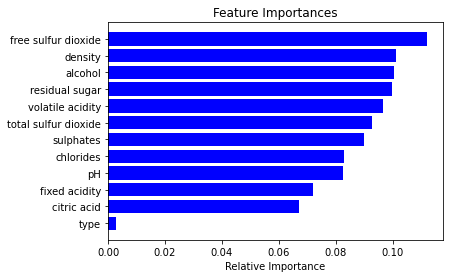

In [30]:
# plot the feature importance
from matplotlib import pyplot as plt
importances = rf.feature_importances_
indices = np.argsort(importances)
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [vars[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

<AxesSubplot:>

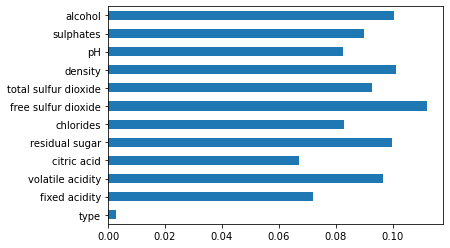

In [31]:
# this is another way to plot(the same as the last one)
feat_importances = pd.Series(rf.feature_importances_, index=vars)
feat_importances.plot(kind='barh')